## Spatial Filtering in Image Processing ##
**Spatial Filtering is a fundamental image processing technique where a small matrix(called a kernel or filter or mask) is applied over an image to emphasize or suppress certain features like edges, noise, or texture(blurring)**

### Common Use Cases ###
- Blurrring / Smoothin
- Sharpening
- Edge Detection
- Noise Reduction


## Types of Linear Filters ##
**1. Linear Spatial Filters**<Br>
**2. Non-linear Spatial Filters**

### Linear Spatial Filters
***A Linear Spatial Filter modifies a pixel by taking a weighted sum of it and its neighboring pixels, where the weights are defined by a kernel (or filter matrix)***


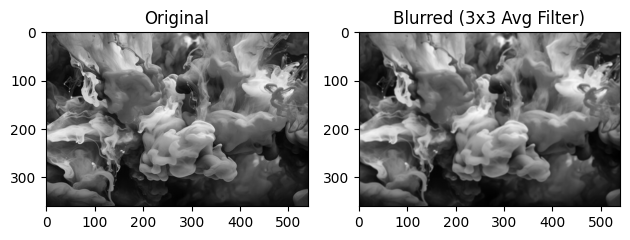

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Define a simple 3x3 averaging kernel
kernel = np.ones((3, 3), np.float32) / 9

# Apply the filter using cv2.filter2D
filtered = cv2.filter2D(img, -1, kernel)

# Show results
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(filtered, cmap='gray')
plt.title('Blurred (3x3 Avg Filter)')

plt.tight_layout()
plt.show()

In [39]:
# Now, imagine applying this kernel to a pixel's 3×3 neighborhood. You’re summing 9 pixel values. Without dividing, you’d be amplifying the brightness.
# To turn it into an averaging filter, we divide every value by the total number of elements:

# When this kernel is applied:

# You multiply it element-wise with the neighborhood

# Then sum everything

# Which is equivalent to taking the average of the 9 pixels

arr = np.arange(24).reshape(4, 6)
print(arr)
arr = arr / 9
print(arr)
arr_ones = np.ones((3, 3), np.float32)
print(arr_ones)
arr_ones = arr_ones / 9
print(arr_ones)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
[[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556]
 [0.66666667 0.77777778 0.88888889 1.         1.11111111 1.22222222]
 [1.33333333 1.44444444 1.55555556 1.66666667 1.77777778 1.88888889]
 [2.         2.11111111 2.22222222 2.33333333 2.44444444 2.55555556]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


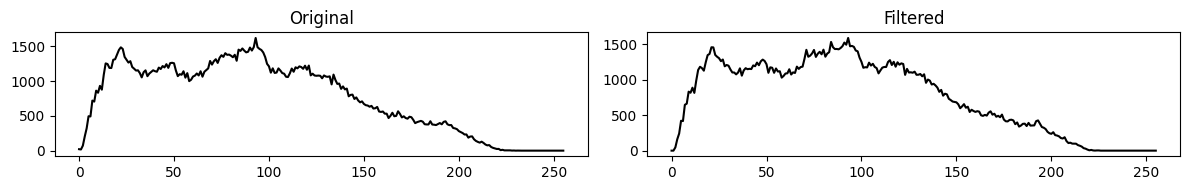

In [40]:

hist_original = cv2.calcHist([img], [0], None, [256], [0, 256])

hist_filtered = cv2.calcHist([filtered], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 2))

plt.subplot(1, 2, 1)
plt.plot(hist_original, color='black')
plt.title("Original")
# plt.xlim((200, 260))

plt.subplot(1, 2, 2)
plt.plot(hist_filtered, color='black')
plt.title("Filtered")
# plt.xlim((0, 30))

plt.tight_layout()
plt.show()

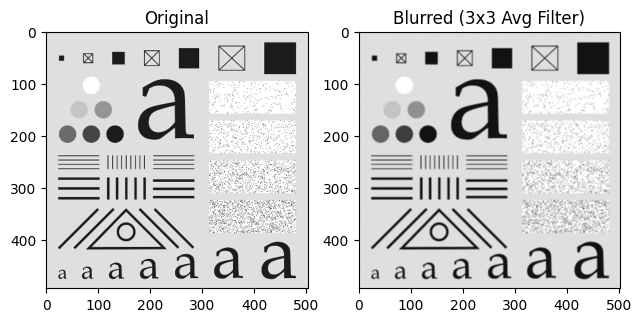

In [41]:
img1 = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3, 3), np.float32) / 9

filtered1 = cv2.filter2D(img1, -1, kernel)

plt.subplot(1, 2, 1)
plt.imshow(img1,cmap='gray')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(filtered1, cmap='gray')
plt.title("Blurred (3x3 Avg Filter)")

plt.tight_layout()
plt.show()


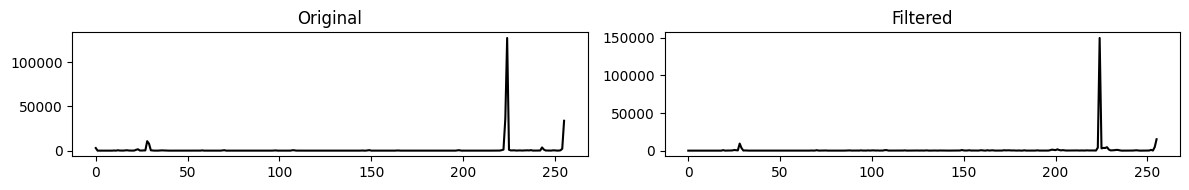

In [42]:

hist_original = cv2.calcHist([img1], [0], None, [256], [0, 256])

hist_filtered = cv2.calcHist([filtered1], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 2))

plt.subplot(1, 2, 1)
plt.plot(hist_original, color='black')
plt.title("Original")
# plt.xlim((200, 260))

plt.subplot(1, 2, 2)
plt.plot(hist_filtered, color='black')
plt.title("Filtered")
# plt.xlim((0, 30))

plt.tight_layout()
plt.show()

### To See Visible Changes, Increase the size of Kernel ###

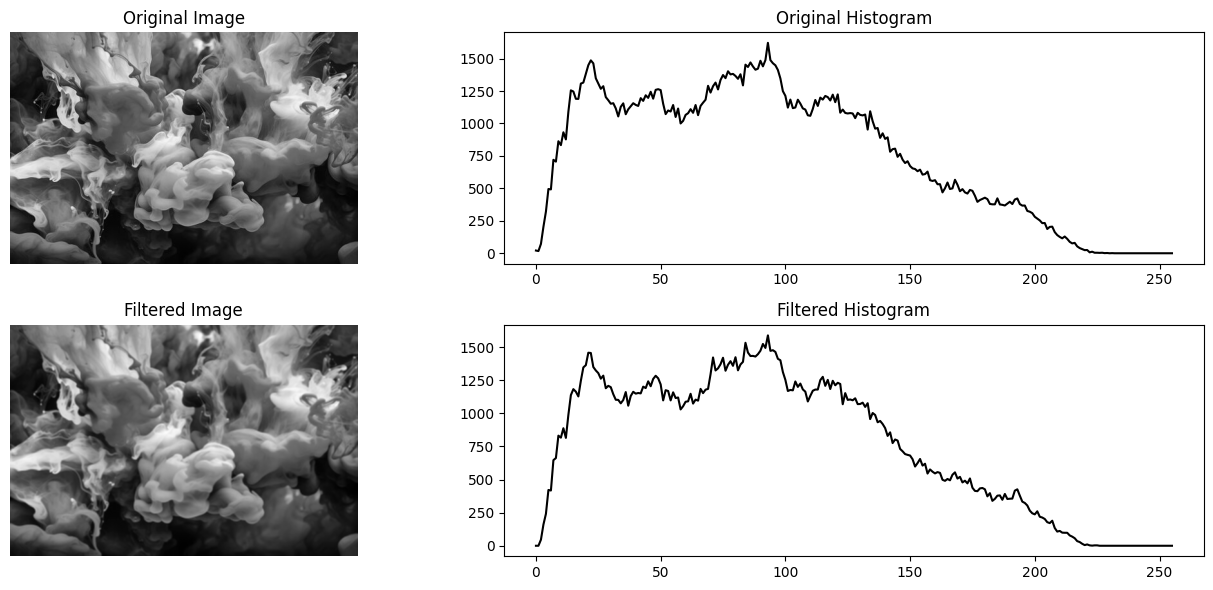

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
img = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)

# Define a 15x15 averaging kernel
kernel = np.ones((3, 3), np.float32) / 9

# Apply filter
filtered = cv2.filter2D(img, -1, kernel)

# Calculate histograms
hist_original = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_filtered = cv2.calcHist([filtered], [0], None, [256], [0, 256])

# Plot everything
plt.figure(figsize=(14, 6))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Histogram of Original
plt.subplot(2, 2, 2)
plt.plot(hist_original, color='black')
plt.title("Original Histogram")

# Filtered Image
plt.subplot(2, 2, 3)
plt.imshow(filtered, cmap='gray')
plt.title("Filtered Image")
plt.axis('off')

# Histogram of Filtered
plt.subplot(2, 2, 4)
plt.plot(hist_filtered, color='black')
plt.title("Filtered Histogram")

plt.tight_layout()
plt.show()


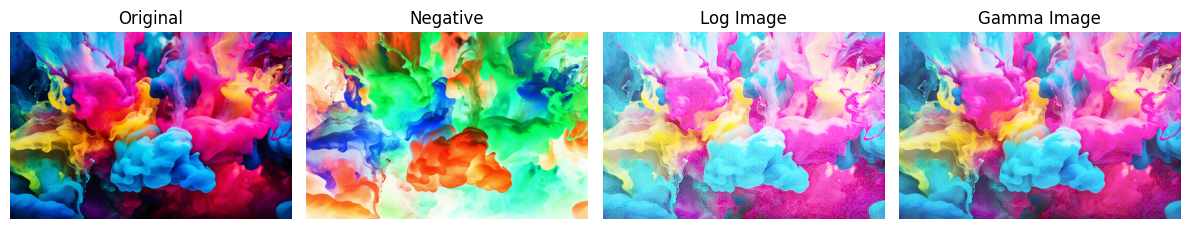

In [79]:
img = cv2.imread('img1.jpg', cv2.IMREAD_COLOR_RGB)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # For cv2

# print(f"Shape:{img.shape}, Type:{img.dtype}")


# cv2.imshow('Color Anti-riot', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()



negative = 255 - img

# cv2.imshow('Color Anti-riot', negative)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

img_float = img.astype(np.float32)
c_log = 255 / np.log(1 + np.max(img_float))
log_image = c_log * np.log(1 + img_float)
log_image = np.array(log_image, dtype=np.uint8)

# cv2.imshow('Log Image', log_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

gamma = 0.4
gamma_image = np.power(img / 255.0, gamma)
gamma_image = np.uint8(gamma_image*255)

# cv2.imshow("Gamma", gamma_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


images = np.array([img, negative, log_image, gamma_image])
titles = np.array(["Original", "Negative", "Log Image", "Gamma Image"])

plt.figure(figsize=(12,6))

n = len(images)
for i in range(n):
  plt.subplot(1, n, i + 1)
  plt.imshow(images[i])
  plt.title(titles[i])
  plt.axis('off')

plt.tight_layout()
plt.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


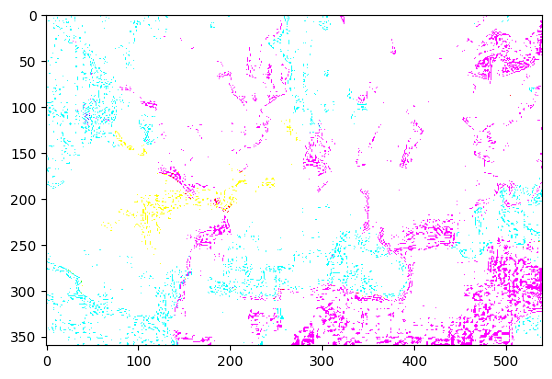

In [82]:
plt.imshow(img_float)
plt.show()

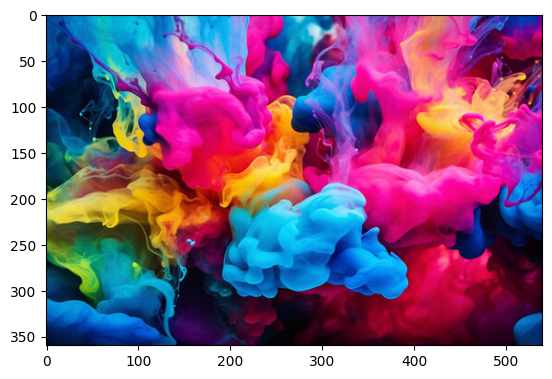

In [83]:
img_norm = img_float / 255.0
plt.imshow(img_norm)
plt.show()